In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
crypto_df=pd.read_csv("crypto_data.csv")

In [3]:
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [4]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
crypto_df.shape

(1252, 7)

In [6]:
crypto_is_trading_df = crypto_df.query("IsTrading==True")

In [7]:
crypto_is_trading_df.shape

(1144, 7)

In [8]:
crypto_is_trading_without_nan_df=crypto_is_trading_df.copy().dropna()

In [9]:
crypto_is_trading_without_nan_df.shape

(685, 7)

In [10]:
crypto_is_mined_raw_df=crypto_is_trading_without_nan_df.query("TotalCoinsMined>0")

In [11]:
crypto_is_mined_df=crypto_is_mined_raw_df.drop(columns=["Unnamed: 0", "CoinName", "IsTrading"])

In [12]:
crypto_is_mined_df.shape

(532, 4)

In [13]:
crypto_is_mined_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [14]:
crypto_is_mined_df[crypto_is_mined_df.duplicated()]

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
572,PoS,PoS,20000000.0,20000000


In [15]:
crypto_is_mined_df.drop_duplicates(inplace=True)

In [16]:
crypto_is_mined_df.shape

(531, 4)

In [17]:
crypto_is_mined_dummy_df=pd.get_dummies(crypto_is_mined_df[["Algorithm", "ProofType"]])

In [18]:
crypto_cluster_df=crypto_is_mined_dummy_df.merge(crypto_is_mined_df, left_index=True, right_index=True)

In [19]:
crypto_cluster_df.shape

(531, 100)

In [20]:
crypto_cluster_df=crypto_cluster_df.drop(columns=["Algorithm","ProofType"]).reset_index(drop=True)

In [21]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crypto_cluster_df[["TotalCoinsMined", "TotalCoinSupply"]])

In [22]:
scaled_data_df=pd.DataFrame(scaled_data, columns=["TotalCoinsMined_scaled", "TotalCoinSupply_scaled"])

In [23]:
crypto_cluster_scaled_df=(
    crypto_cluster_df.merge(scaled_data_df,left_index=True, right_index=True)
    .drop(columns=["TotalCoinsMined", "TotalCoinSupply"])
)

In [24]:
crypto_cluster_scaled_df.head()

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,TotalCoinsMined_scaled,TotalCoinSupply_scaled
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.117219,-0.153017
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.094102,-0.145163
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.524239,4.485014
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116826,-0.152707
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.114860,-0.153017


### PCA dimentional reduction

In [25]:
pca_99 = PCA(n_components=0.99)
crypto_pca_99 = pca_99.fit_transform(crypto_cluster_scaled_df)
pca_99.explained_variance_ratio_

array([0.4858637 , 0.11231373, 0.08454971, 0.07272582, 0.05713353,
       0.03182348, 0.0197347 , 0.00969518, 0.00892539, 0.00814824,
       0.00752373, 0.00628462, 0.00580205, 0.00529267, 0.00491892,
       0.0048129 , 0.00428187, 0.00359554, 0.00306741, 0.00257981,
       0.00214396, 0.00214396, 0.00214396, 0.0021433 , 0.00213044,
       0.00205139, 0.00184424, 0.00174872, 0.00164301, 0.00160796,
       0.0016033 , 0.00152753, 0.00138753, 0.00128768, 0.0010868 ,
       0.00107198, 0.00107198, 0.00107198, 0.00107198, 0.00107198,
       0.00107198, 0.00107198, 0.00106986, 0.00106451, 0.00105642,
       0.00102368, 0.00098973, 0.00084409, 0.00070907, 0.00053599,
       0.00053599, 0.00053599, 0.00053599, 0.00053599, 0.00053599,
       0.00053599, 0.00053599, 0.00053599, 0.00053599, 0.00053599,
       0.00053599, 0.00053599, 0.00053599, 0.00053599, 0.00053599,
       0.00053599, 0.00053599, 0.00053599])

In [26]:
pca_90 = PCA(n_components=0.90)
crypto_pca_90 = pca_90.fit_transform(crypto_cluster_scaled_df)
pca_90.explained_variance_ratio_

array([0.4858637 , 0.11231373, 0.08454971, 0.07272582, 0.05713353,
       0.03182348, 0.0197347 , 0.00969518, 0.00892539, 0.00814824,
       0.00752373, 0.00628462])

##### Insights:
* Preserving 90% of the explained variance , we need the first 12 components.
* The higher the explained variance, the more components are needed.

### t-SNE

In [27]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_cluster_scaled_df)

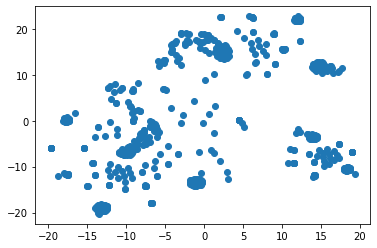

In [28]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

#### Insights:
- the t-SNE shows that there are distict clusters.

In [29]:
tsne_features.shape

(531, 2)

### K-Means

In [30]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_cluster_scaled_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,1865.702448
1,2,1182.740473
2,3,970.099275
3,4,788.853861
4,5,664.758876


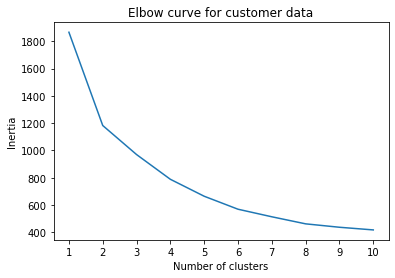

In [31]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

#### Insight:
- The elbow appears at k=8.

In [32]:
# Using the elbow number k=8 to fit and label clusters

In [33]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [34]:
clusters = get_clusters(8, crypto_cluster_scaled_df)

In [35]:
clusters['class'].unique()

array([5, 7, 2, 3, 0, 6, 4, 1], dtype=int32)

In [36]:
clusters.head()

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,TotalCoinsMined_scaled,TotalCoinSupply_scaled,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.117219,-0.153017,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.094102,-0.145163,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.524239,4.485014,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.116826,-0.152707,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.114860,-0.153017,2


In [37]:
# Visualizing the clustered data by t-SNE

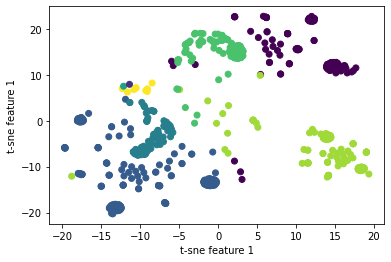

In [38]:
plt.scatter(tsne_features[:,0], tsne_features[:,1],c=clusters['class'])
plt.xlabel('t-sne feature 1')
plt.ylabel('t-sne feature 1')
plt.show()

In [39]:
crypto_is_mined_raw_copy_df=crypto_is_mined_raw_df.drop(labels=572, axis=0).copy()

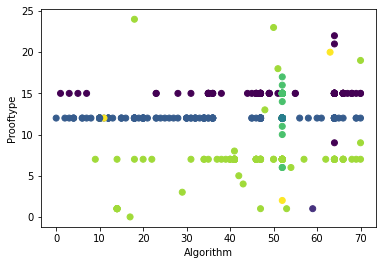

In [40]:
label=LabelEncoder()
algorithm=label.fit_transform(crypto_is_mined_raw_copy_df['Algorithm'])
prooftype=label.fit_transform(crypto_is_mined_raw_copy_df['ProofType'])
plt.scatter(algorithm,prooftype,c=clusters['class'])
plt.xlabel('Algorithm')
plt.ylabel('Prooftype')
plt.show()

In [41]:
crypto_is_mined_raw_copy_df['algorithm_encode']=algorithm
crypto_is_mined_raw_copy_df['prooftype_encode']=prooftype
crypto_is_mined_raw_copy_df['class']=clusters['class']

In [43]:
crypto_is_mined_raw_copy_df.head(20)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,algorithm_encode,prooftype_encode,class
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42,52,15,5.0
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000,52,15,7.0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359,66,15,3.0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000,47,12,2.0
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0,20,12,2.0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000,52,12,2.0
10,DASH,Dash,X11,True,PoW/PoS,9.031294e+06,22000000,64,15,6.0
11,XMR,Monero,CryptoNight-V7,True,PoW,1.720114e+07,0,12,12,2.0
12,ETC,Ethereum Classic,Ethash,True,PoW,1.133597e+08,210000000,20,12,0.0
13,ZEC,ZCash,Equihash,True,PoW,7.383056e+06,21000000,18,12,6.0


#### insights:
- There are generally 8 types of cryptocurrencies types based on mainly on its prooftype. 
- For example, the most popular BTC and ETH, its prooftype=`PoW`, and  they are both in the same cluster.
- We could can discover the cryptocurrency that in the same cluster as `BTC` and `ETH`, such as `LTC`, `XMR`, `SPR' and etc.